In [4]:
import requests
from bs4 import BeautifulSoup # BeautifulSoup is used for parsing HTML

# Create a function to parse the HTML of the IMDB webpage to extract the movies' information
def scrape_imdb(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser") # Parse the HTML of the webpage with BeautifulSoup
 
    movies = []
    for movie in soup.find_all("div", class_="lister-item mode-advanced"):
        
        title = movie.find("h3", class_="lister-item-header").find("a").get_text(strip=True)

        certificate = movie.find("span", class_="certificate")
        if certificate is not None:
            certificate = certificate.text
        else:
            certificate = "N/A"

        runtime = movie.find("span", class_="runtime")
        if runtime is not None:
            runtime = int(runtime.text.split()[0])
        
        genre = movie.find("span", class_="genre")
        if genre is not None:
            genre = genre.get_text(strip=True).split(", ")
        else:
            genre = "N/A"
        
        rating = movie.find("div", class_="inline-block ratings-imdb-rating")
        if rating is not None:
            rating = float(rating.text)
        
        metascore = movie.find("span", class_="metascore mixed")
        if metascore is not None:
            metascore = int(metascore.text)
        
        brief = movie.find_all("p", class_="text-muted")[1]
        if brief is not None:
            brief = brief.get_text(strip=True)
        else:
            brief = "N/A"

        votes = movie.find("span", {'name': 'nv'})
        if votes is not None:
            votes = int(votes["data-value"])
        else:
            votes = 0

        directors_stars = movie.find("p", class_="")
        directors, stars = directors_stars.get_text(strip=True).split("|")
        directors = directors.split(":")[1].strip().split(",")
        stars = stars.split(":")[1].strip().split(",")

        movies.append({
            "title": title,
            "certificate": certificate,
            "runtime": runtime,
            "genre": genre,
            "rating": rating,
            "metascore": metascore,
            "brief": brief,
            "directors": directors,
            "stars": stars,
            "votes": votes
        })

    return movies

if __name__ == "__main__":
    movies = scrape_imdb("https://www.imdb.com/search/title?title_type=feature")

In [14]:
import pandas as pd # pandas is used for data manipulation and analysis

# Create a DataFrame from the extracted information
dfMovies = pd.DataFrame(movies)

print("Summary of top 50 popular movies in IMDB: \n")

print("Total number of votes = {:,d}".format(dfMovies["votes"].sum()))
print("Average rating = {:1.2f}".format(dfMovies["rating"].mean()))
print("Average metascore = {:1.2f}".format(dfMovies["metascore"].mean()))
print("Average runtime = {:1.2f} min".format(dfMovies["runtime"].mean(),"mins"))

# Calculate the correlation between number of votes and ratings
corrVoteRating = dfMovies['votes'].corr(dfMovies['rating'])
corrRatingMetescore = dfMovies['rating'].corr(dfMovies['metascore'])

print("The correlation between votes and ratings is {:1.3f}".format(corrVoteRating))
print("The correlation between ratings and Metascore is {:1.3f}".format(corrRatingMetescore))

Summary of top 50 popular movies in IMDB: 

Total number of votes = 9,472,574
Average rating = 7.06
Average metascore = 51.87
Average runtime = 129.60 min
The correlation between votes and ratings is 0.507
The correlation between ratings and Metascore is 0.364


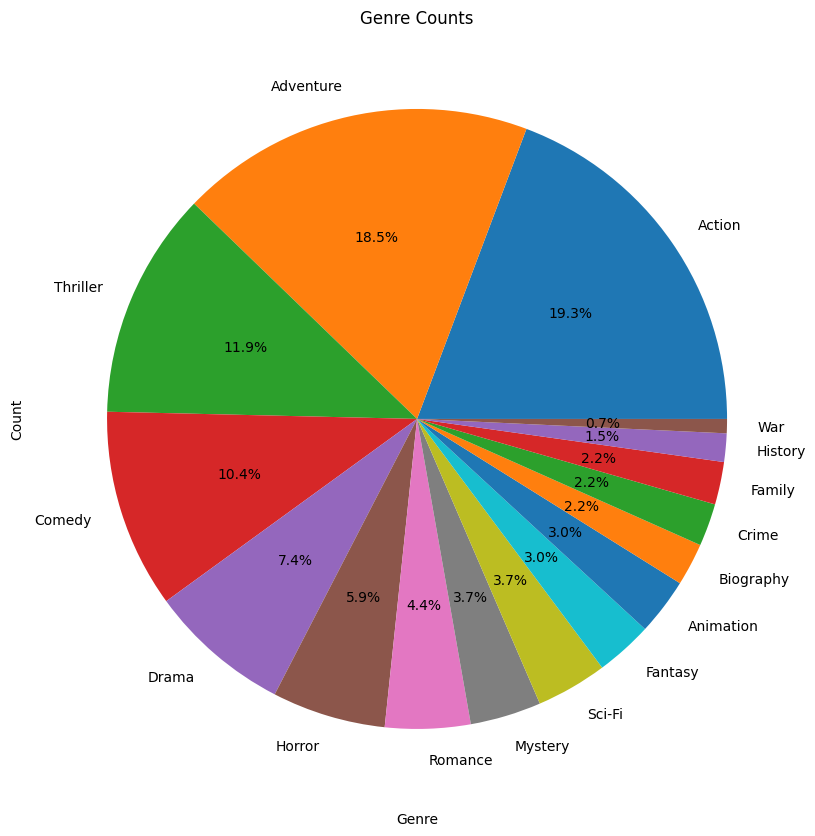

In [6]:
import matplotlib.pyplot as plt # matplotlib is used for creating static, animated, and interactive visualizations in Python

# Use the explode function to create a new row for each genre
dfMovies_exploded = dfMovies.explode('genre')

# Count the number of occurrences of each genre
genre_counts = dfMovies_exploded['genre'].value_counts()

# Sort the values in descending order so the plot shows the most common genres first
sorted_genre_counts = genre_counts.sort_values(ascending=False)

# Plot the pie chart
plt.figure(figsize=(10,20))
sorted_genre_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

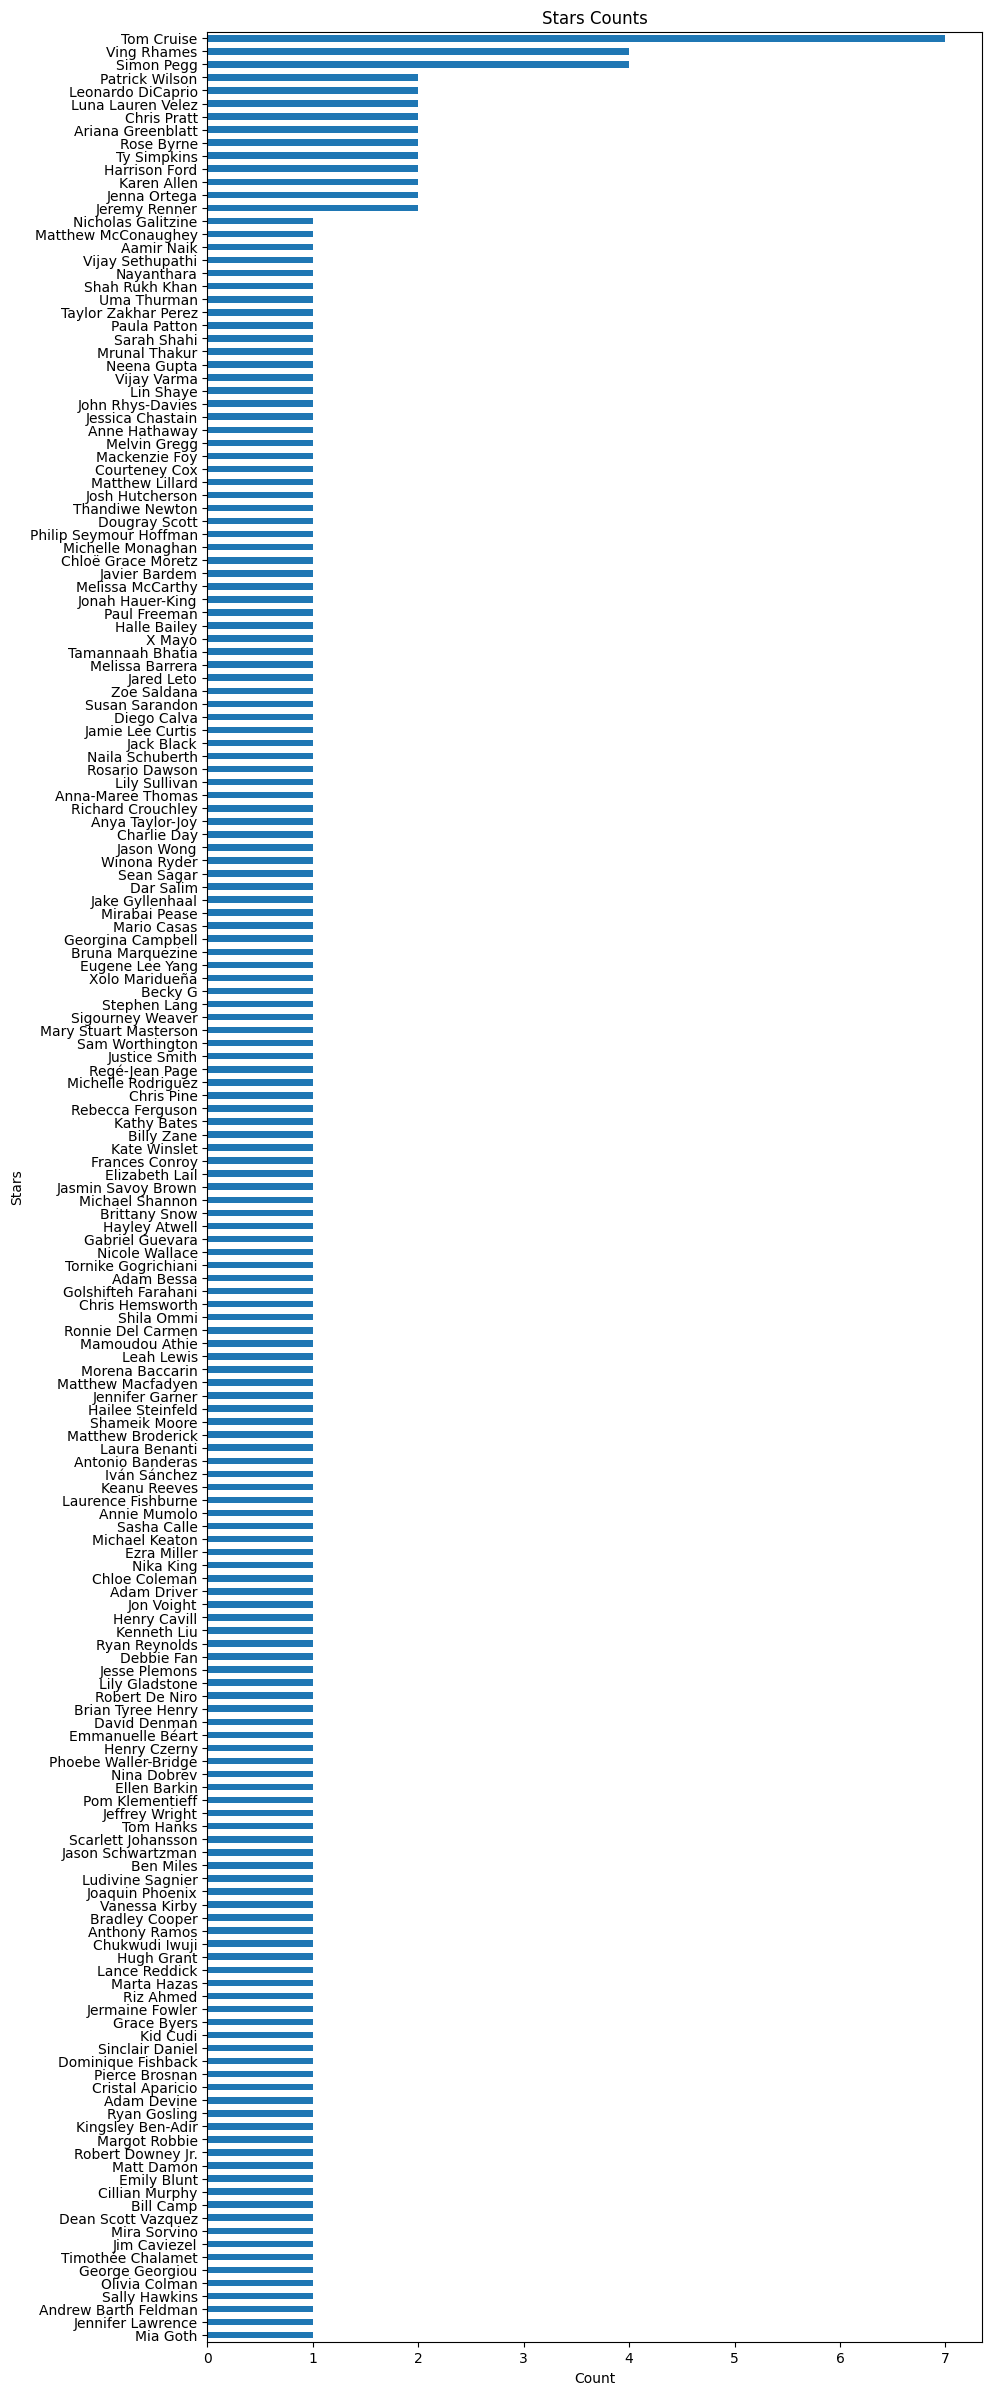

In [7]:
# Use the explode function to create a new row for each star
dfMovies_exploded = dfMovies.explode('stars')

# Count the number of occurrences of each star
stars_counts = dfMovies_exploded['stars'].value_counts()

# Sort the values in ascending order so the plot shows the least common stars first
sorted_stars_counts = stars_counts.sort_values(ascending=True)

# Plot the bar chart
plt.figure(figsize=(10,30))
sorted_stars_counts.plot(kind='barh')
plt.title('Stars Counts')
plt.xlabel('Count')
plt.ylabel('Stars')
plt.show()